Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр.0381 Березовская Валерия и Котов Дмитрий. Вариант №9

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Дискретный фильтр** $-$ любой фильтр, обрабатывающий цифровой сигнал с целью выделения и/или подавления определённых частот этого сигнала.

Cвойства:
1. линейность
2. стационарность

Дискретный сигнал:

$s(t) = \displaystyle\sum_{k=-\infty}^{\infty} x_kδ(t-k)$

Спектр дискретного сигнала:

$S(\omega)=\displaystyle\sum_{k=-\infty}^{\infty}x_k e^{-i\omega k}$

Дискретное преобразование Фурье(ДПФ):

$X(n) = \displaystyle\sum_{k=0}^{N-1} x_ke^{-i\frac{2πn}{N}k}, k ∈ [0, N-1]$

Формула численного дифференцирования 1-го порядка.
$y_n = \frac{s_{n+1}-s_{n-1}}{2h}$

$H(\omega) = i\cdot sin(\omega)$

Формула прямоугольников для численного интегрирования.

$y_{n+1}=y_{n}+s_{n+\frac{1}{2}}$

$y_0=0$

$H(\omega)=\frac{1}{2i\cdot sin(\frac{\omega}{2})}$


Формула трапеций для численного интегрирования.

$y_{n+1}=y_{n}+\frac{1}{2}(s_{n}+s_{n+1})$

$y_0=0$

$H(\omega)=\frac{1}{2}\frac{cos\big( \frac{\omega}{2} \big)}{i\cdot sin\big( \frac{\omega}{2} \big)}$

Формула Симпсона для численного интегрирования.

$y_{n+1}=y_{n-1}+\frac{1}{3}(s_{n-1}+4s_{n}+s_{n+1})$

$y_0=0$

$H(\omega)=\frac{1}{3}\frac{cos(\omega)+2}{i\cdot sin(\omega)}$


## Постановка задачи:

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения:

1. Сформировать дискретный сигнал посредством дискретизации с шагом T=1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(ω_kt+φ_k)$.. Частота каждой из гармоник не должна превышать
π. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до
π, изменяющимися с шагом $Δω=0.1π$.. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета (N=31).
2. Визуализировать исходные аналоговый и дискретизированный сигналы.
3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.
5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.
6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.
7. Проанализировать результат на соответствие значениям H(ω).Сделать выводы.
8. Повторить п. 4–7 для следующих фильтров:

    a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

    b.Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).
9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

## Выполнение работы


#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом T = 1  непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(ω_kt+φ_k)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

Для дальнейшей дискретизации необходимо задать  аналоговый:

$s(t) = \displaystyle\sum_{k}A_kcos(ω_kt+ϕ_k)$, где $A_k∈[1,11], ϕ_k - \text{случайная величина от 0 до 0.5, а } ω_k \text{ изменяется } Δω = 0.1π$

In [ ]:
# Параметры
N = 32
T = 1
omega_step = 0.1 * np.pi  # Шаг частоты
omega_max = np.pi  # Максимальная частота

# Генерация амплитуд и начальных фаз случайным образом
amplitudes = np.random.randint(1, 12, 11)
phases = np.random.uniform(0, 0.5, 11)

# Формирование непрерывного сигнала
t = np.linspace(0, N * T, N)
continuous_signal = np.zeros_like(t)

# Создание линейной комбинации косинусоид
for k in range(11):
    omega_k = k * omega_step
    continuous_signal += amplitudes[k] * np.cos(omega_k * t + phases[k])

# Нормализация коэффициентов
continuous_signal /= np.sum(amplitudes)

# Дискретизация сигнала
discrete_signal = continuous_signal[::T]

#### 2. Визуализация исходных аналоговый и дискретизированных сигналов:

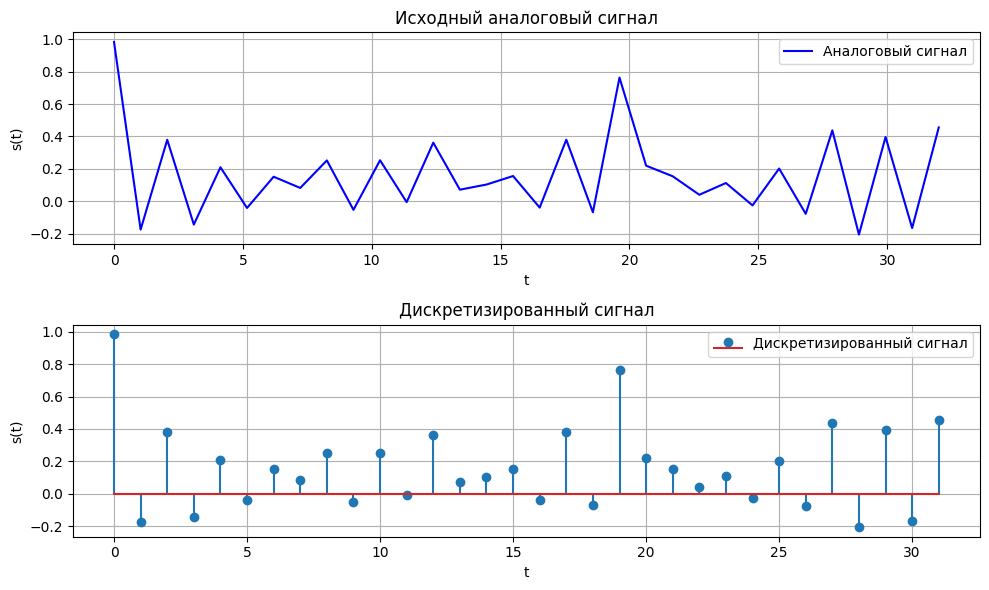

In [ ]:
plt.figure(figsize=(10, 6))

# Исходный непрерывный сигнал
plt.subplot(2, 1, 1)
plt.plot(t, continuous_signal, label='Аналоговый сигнал', color='blue')
plt.title('Исходный аналоговый сигнал')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.legend()

# Дискретизированный сигнал
plt.subplot(2, 1, 2)
plt.stem(discrete_signal, label='Дискретизированный сигнал')
plt.title('Дискретизированный сигнал')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


#### 3. Нахождение дискретных отсчётов спектра с помощью ДПФ. Визуализация спектра.

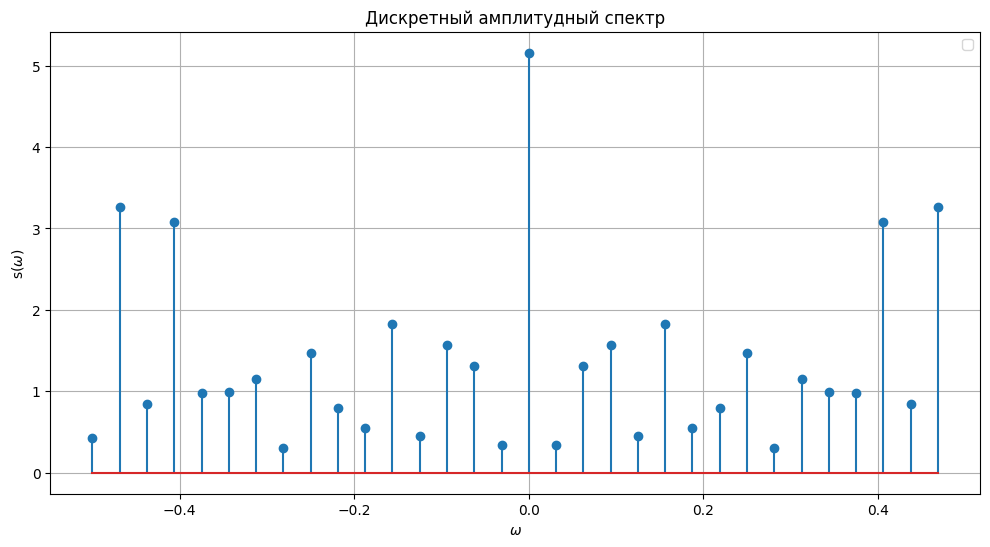

In [ ]:
fft_result = np.fft.fft(discrete_signal)

frequency_axis = np.fft.fftfreq(len(discrete_signal), d=T)

# Визуализация спектра
plt.figure(figsize=(12, 6))
plt.stem(frequency_axis, np.abs(fft_result))
plt.title('Дискретный амплитудный спектр')
plt.xlabel('$\omega$')
plt.ylabel('s($\omega$)')
plt.grid(True)
plt.legend()
plt.show()

Дискретный сигнал можно представить как

$s(t) = \displaystyle\sum_{k}x_kδ(t-k)$

Используя ДПФ, спектр можно записать в следующем виде:

$s(w) = \displaystyle\sum_{k}x_ke^{-i\omega k}$

#### 4. Линейное сглаживание по 5-ти и 9-ти точкам

Линейное сглаживание по 5-ти точкам:

$y_n=\frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$

Передаточная функция:

$H(\omega) = \frac{2\cos(\omega)+2\cos(2\omega)+1}{5}$

Линейное сглаживание по 9-ти точкам:

$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$

Передаточная функция:

$H(\omega)=\frac{1+2\cos(\omega)+2\cos(2\omega)+2\cos(3\omega)+2\cos(4\omega)}{9}$


In [83]:
padded_signal = np.pad(discrete_signal, (4, 4), mode='reflect')

smoothed_5_points = np.convolve(padded_signal, np.ones(5) / 5, mode='same')

smoothed_9_points = np.convolve(padded_signal, np.ones(9) / 9, mode='same')

smoothed_5_points = smoothed_5_points[:len(discrete_signal)]
smoothed_9_points = smoothed_9_points[:len(discrete_signal)]

#### 5. Визуализация полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

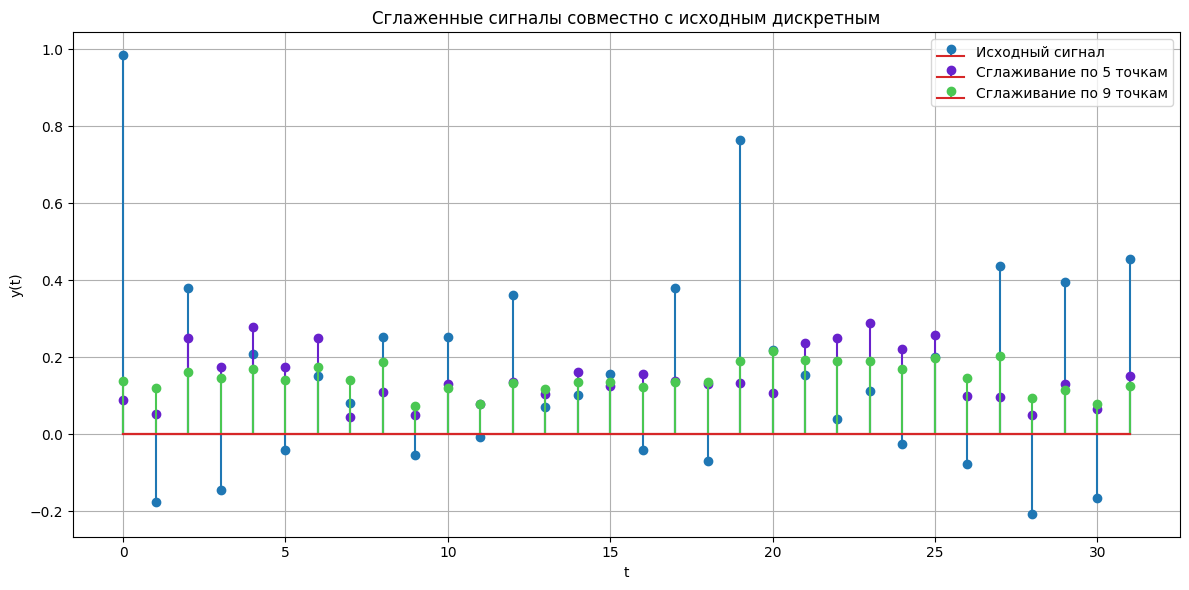

In [ ]:
plt.figure(figsize=(12, 6))

plt.stem(discrete_signal, label='Исходный сигнал')
plt.stem(smoothed_5_points, label='Сглаживание по 5 точкам', linefmt="#6821cc")
plt.stem(smoothed_9_points, label='Сглаживание по 9 точкам', linefmt="#4ac752")
plt.title('Сглаженные сигналы совместно с исходным дискретным')


plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

#### 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

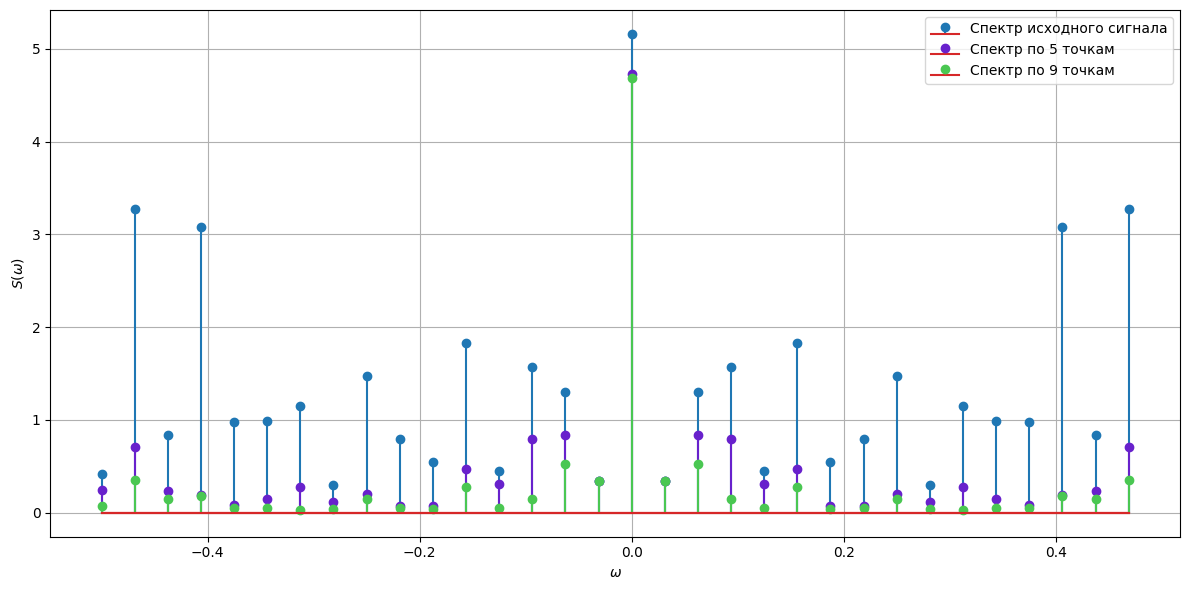

In [ ]:
fft_filtered_5 = np.fft.fft(smoothed_5_points)

fft_filtered_9 = np.fft.fft(smoothed_9_points)

# Визуализация спектров исходного и фильтрованного сигналов
plt.figure(figsize=(12, 6))

plt.stem(frequency_axis , np.abs(fft_result), label='Спектр исходного сигнала')
plt.stem(frequency_axis , np.abs(fft_filtered_5), label='Спектр по 5 точкам',  linefmt="#6821cc")
plt.stem(frequency_axis, np.abs(fft_filtered_9), label='Спектр по 9 точкам', linefmt="#4ac752")
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 7. Анализ на соответствие с H(ω).

Из графиков видно, что изменение значений дискреных отсчётов согласуется со значениями предаточных функций.


На основе графиков можно сделать вывод, что в 0 сигнал подавляется хуже, чем остальных частотных областях. При использовании 9 точек подавление высоких частот происходит лучше, чем прииспользовании 5.

#### 8. Повтор п. 4–7



*   Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
*   Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).



##### **Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.:**

п.4 Применение дискретного фильтра, соответствующего численному дифференцированию 1-го порядка.

$y_n = \frac{s_{n+1}-s_{n-1}}{2h}$

Передаточная функция:

$H(\omega) = \frac{e^{i\omega}-e^{-i\omega}}{2}=i\cdot sin(\omega)$

In [ ]:
# Фильтрация сигнала по численному дифференцированию
filtered_signal = np.zeros_like(discrete_signal)

# Применение центральной разности для численного дифференцирования
for i in range(1, len(discrete_signal) - 1):
    filtered_signal[i] = (discrete_signal[i + 1] - discrete_signal[i - 1]) / 2

 п.5 Визуализация дискретного сигнала после фильтрации численным дифференцированием 1-ого порядка.

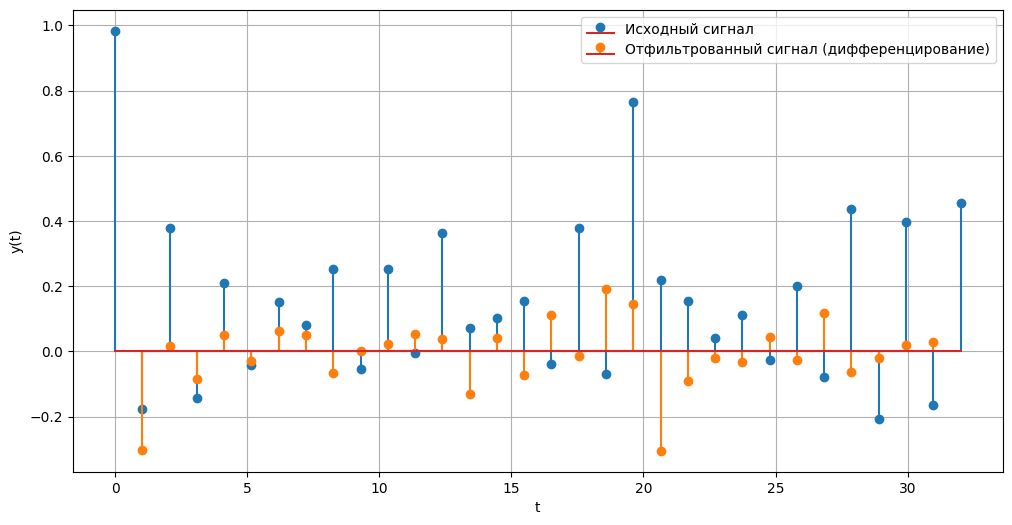

In [ ]:
# Визуализация исходного и отфильтрованного сигналов
plt.figure(figsize=(12, 6))

plt.stem(t, discrete_signal, label='Исходный сигнал')
plt.stem(t[1:-1], filtered_signal[1:-1], label='Отфильтрованный сигнал (дифференцирование)',linefmt="C1")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

plt.show()

п.6 Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.

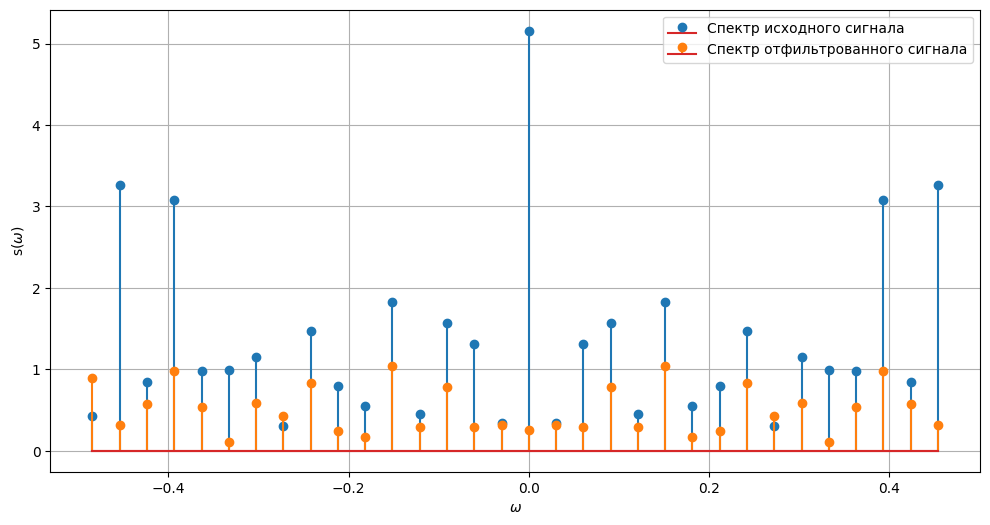

In [ ]:
fft_filtered = np.fft.fft(filtered_signal)
filtred_frequency_axis = np.fft.fftfreq(len(filtered_signal), d=t[1] - t[0])

plt.figure(figsize=(12, 6))

plt.stem(filtred_frequency_axis, np.abs(fft_result), label='Спектр исходного сигнала')
plt.stem(filtred_frequency_axis, np.abs(fft_filtered), label='Спектр отфильтрованного сигнала',linefmt="C1")
plt.xlabel('$\omega$')
plt.ylabel('s($\omega$)')
plt.grid(True)
plt.legend()
plt.show()

п.7 Анализ

На поступивший дискретный сигнал оказывает большое воздействие фильтр, являющийся численным дифференцированием 1-го порядка. Из графика спектра можно понять, что низкие и высокие частоты частоты в отличие от средних подавляются лучше.

Из графиков видно, что изменение значений дискреных отсчётов согласуется со значениями предаточных функций $H(\omega)$.

##### Исследование дискретного фильтра, соответствующего численному интегрированию (прямоугольников, трапеций, Симпсона).:

п.4 Применение дискретного фильтра, соответствующего численному интегрированию (прямоугольников, трапеций, Симпсона).

Формула прямоугольников:

$y_{n+1} = y_n + s_{n+\frac{1}{2}}$

Передаточная функция :

$H(\omega)=\frac{1}{2i\cdot sin(\frac{\omega}{2})}$

Формула трапеций:

$y_{n+1} = y_n + \frac{s_n+s_{n+1}}{2}$

$H(\omega)=\frac{1}{2}\frac{cos\big( \frac{\omega}{2} \big)}{i\cdot sin\big( \frac{\omega}{2} \big)}$

Формула Симпсона:

$y_{n+1} = y_{n-1}+\frac{s_{n-1}+4s_n+s_{n+1}}{3}$

$H(\omega)=\frac{1}{3}\frac{cos(\omega)+2}{i\cdot sin(\omega)}$


In [ ]:
# Метод прямоугольников для численного интегрирования (сумма значений)
integral_rectangular = np.cumsum(discrete_signal)

# Метод трапеций для численного интегрирования
integral_trapezoidal = np.cumsum((discrete_signal[:-1] + discrete_signal[1:]) / 2)

# Метод Симпсона для численного интегрирования
integral_simpson = np.cumsum(discrete_signal)
integral_simpson[0] = discrete_signal[0]
for i in range(1, len(discrete_signal) - 1):
    if i % 2 == 0:
        integral_simpson[i] = integral_simpson[i-1] + (discrete_signal[i-1] + 4 * discrete_signal[i] + discrete_signal[i+1]) / 3


 п.5 Визуализация дискретного сигнала после использования дискретного фильтра, соответствующего численному интегрированию (прямоугольников, трапеций, Симпсона).

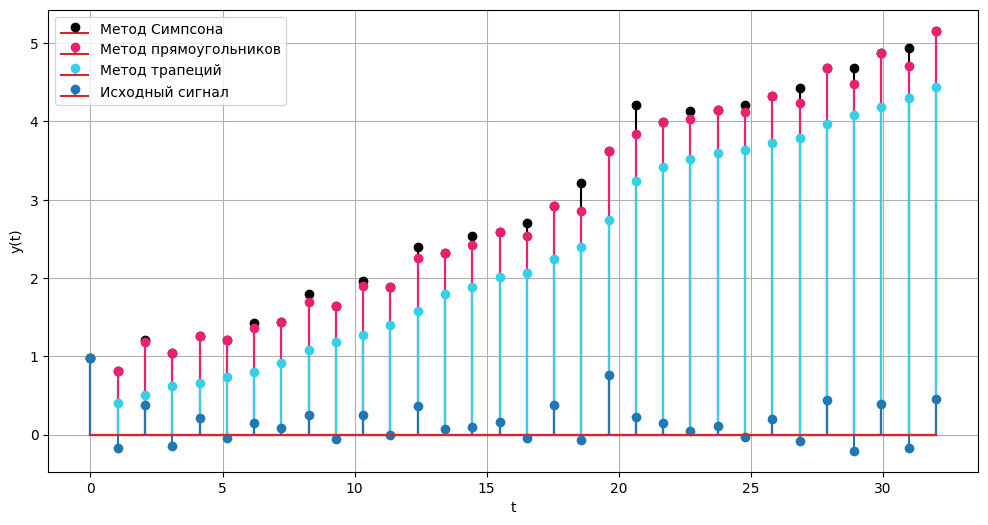

In [ ]:
# Визуализация дискретного сигнала после применения различных методов численного интегрирования
plt.figure(figsize=(12, 6))

plt.stem(t, integral_simpson, label='Метод Симпсона', linefmt="#000000")
plt.stem(t, integral_rectangular, label='Метод прямоугольников', linefmt="#ed1f71" )
plt.stem(t[1:], integral_trapezoidal, label='Метод трапеций', linefmt="#35d0e8")
plt.stem(t, discrete_signal, label='Исходный сигнал')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

plt.show()


п.6 Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.

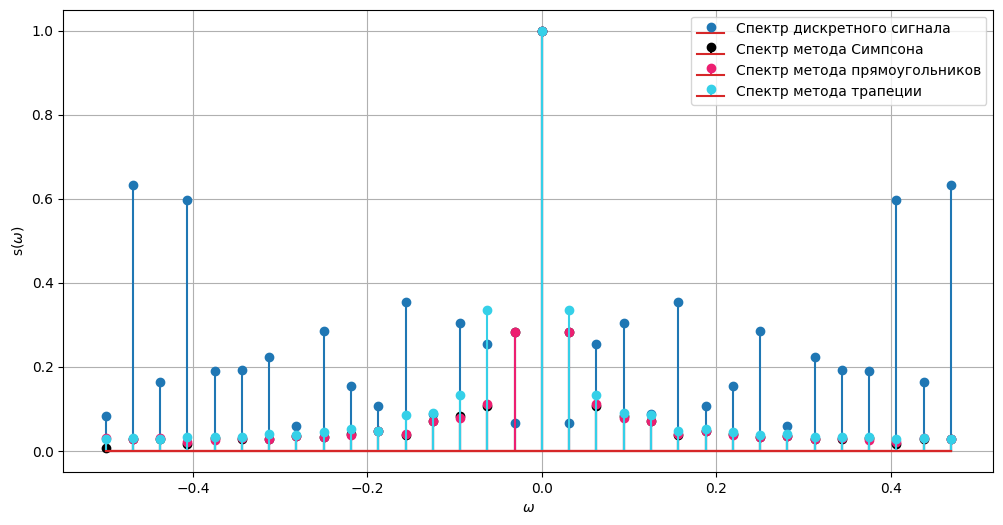

In [ ]:
# Расчет спектров
spectrum_rectangular = np.fft.fft(integral_rectangular)
spectrum_trapezoidal = np.fft.fft(integral_trapezoidal)
spectrum_simpson = np.fft.fft(integral_simpson)

# Создание оси частот для спектров
N = len(discrete_signal)
frequency_axis_integral = np.fft.fftfreq(N, d=1/T)

# Вычисление амплитуд спектров
max_amp_rectangular = np.max(np.abs(spectrum_rectangular))
max_amp_trapezoidal = np.max(np.abs(spectrum_trapezoidal))
max_amp_simpson = np.max(np.abs(spectrum_simpson))
max_amp_discrete = np.max(np.abs(fft_result))

# Нормализация спектров
norm_spectrum_rectangular = np.abs(spectrum_rectangular) / max_amp_rectangular
norm_spectrum_trapezoidal = np.abs(spectrum_trapezoidal) / max_amp_trapezoidal
norm_spectrum_simpson = np.abs(spectrum_simpson) / max_amp_simpson
norm_spectrum_discrete = np.abs(fft_result) / max_amp_discrete

# Визуализация спектров
plt.figure(figsize=(12, 6))

plt.stem(frequency_axis_integral, norm_spectrum_discrete, label = 'Спектр дискретного сигнала')
plt.stem(frequency_axis_integral, norm_spectrum_simpson[:32], label='Спектр метода Симпсона', linefmt="#000000")
plt.stem(frequency_axis_integral, norm_spectrum_rectangular, label='Спектр метода прямоугольников', linefmt="#ed1f71")
plt.stem(frequency_axis_integral[:31], norm_spectrum_trapezoidal, label='Спектр метода трапеции', linefmt="#35d0e8")

plt.xlabel('$\omega$')
plt.ylabel('s($\omega$)')
plt.legend()
plt.grid(True)
plt.show()


п.7 Анализ

Из графиков можно наблюдать, что дискретный фильтр на основе формулы трапеции, в отличие от фильтров основанных на формулах прямоугольников и Симпсона, наибольшее влияние оказывает на низкиз частотках, а на высоких его влияние затухает. Фильтры основанные на формулах прямоугольников и Симпсона напротив - с увеличение частоты усиливают сигнал.

Из графиков видно, что изменение значений дискреных отсчётов согласуется со значениями предаточных функций $H(\omega)$.

## Выводы

В ходе выполнения практической работы:

1. Создан дискретный сигнал путем дискретизации непрерывного аналогового сигнала, представляющего собой линейную комбинацию гармонических функций.

2. С использованием ДПФ были получены дискретные отсчеты спектра для исследуемого дискретного сигнала, а затем проведён анализ на сходство с передаточной функцией.

3. Были изучены способы линейного сглаживания по 5 и 9 точкам, а также фильтрация основанная на численном дифференцировании 1-ого порядка и на численном интегрировании с использованием различных методов: Симпсона, трапеции и прямоугольников.

4. Были проведены сравнения спектров модифицированных сигналов после применения различных методов фильтрации с исходным дискретным.

5. Были обнаружены закономерности между передаточными функциями и использованными фильтрами.

